# Homophily in Social Networks

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configure plotting in Jupyter
plt.rcParams.update({
    'figure.figsize': (20, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [3]:
fname = 'homoph_data.csv'
df = pd.read_csv(fname)
df.shape
G_gender = nx.from_pandas_edgelist(df, 'source', 'target')
G_gender.order(), G_gender.size()

(9, 18)

### Adding attributes to nodes and edges

In [4]:
gender = ['b','b','b','b','b','b','b','g','g','g'] #1-6 boys, 6-9 girls

In [5]:
for node_id in G_gender.nodes: 
    G_gender.nodes[node_id]["gender"] = gender[node_id]

In [6]:
node_colors = [ 'skyblue' if G_gender.nodes[v]["gender"] == 'b' else 'pink' for v in G_gender] 

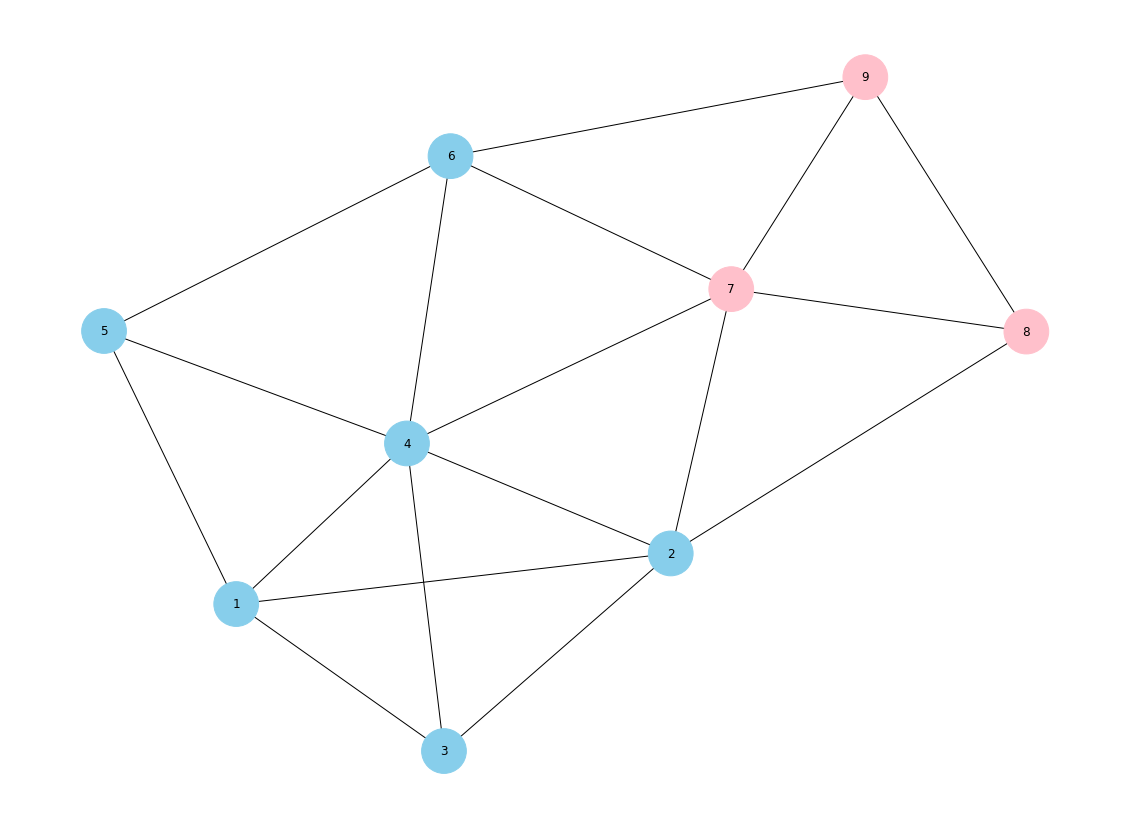

In [7]:
G_pos = nx.spring_layout(G_gender, k=0.3)
nx.draw_networkx(G_gender, G_pos, label=True, node_size = 2000, node_color=node_colors)

In [8]:
list(G_gender.nodes(data=True))

[(1, {'gender': 'b'}),
 (2, {'gender': 'b'}),
 (3, {'gender': 'b'}),
 (4, {'gender': 'b'}),
 (5, {'gender': 'b'}),
 (7, {'gender': 'g'}),
 (8, {'gender': 'g'}),
 (6, {'gender': 'b'}),
 (9, {'gender': 'g'})]

In [9]:
list(G_gender.edges(data=True))

[(1, 2, {}),
 (1, 3, {}),
 (1, 4, {}),
 (1, 5, {}),
 (2, 3, {}),
 (2, 4, {}),
 (2, 7, {}),
 (2, 8, {}),
 (3, 4, {}),
 (4, 5, {}),
 (4, 6, {}),
 (4, 7, {}),
 (5, 6, {}),
 (7, 6, {}),
 (7, 8, {}),
 (7, 9, {}),
 (8, 9, {}),
 (6, 9, {})]

In [10]:
G_gender.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 7), (2, 8), (3, 4), (4, 5), (4, 6), (4, 7), (5, 6), (7, 6), (7, 8), (7, 9), (8, 9), (6, 9)])

In [11]:
def test_homophily(G, attribute, atype):
    
    type1 = []
    type2 = []
    
    for n,t in G.nodes(data=True):
        if t[attribute] == atype:
            type1.append(n)
        else:
            type2.append(n)
    
    # count heterogeneous edges
    hcount = 0
    for (u,v) in G.edges:
        if G.nodes[v][attribute] != G.nodes[u][attribute]:
            hcount = hcount + 1
       
    type1_p = len(type1)/G.order()
    type2_p = len(type2)/G.order()
    type1p = type1_p * type1_p
    type2p = type2_p * type2_p 
    type1_2_p = 2 * type1_p * type2_p
    
    if_no_homoph_edges = type1_2_p * G.size()
    
    return (round(if_no_homoph_edges), hcount)
    

In [12]:
test_homophily(G_gender, 'gender', 'g')

(8, 5)

## Example 2

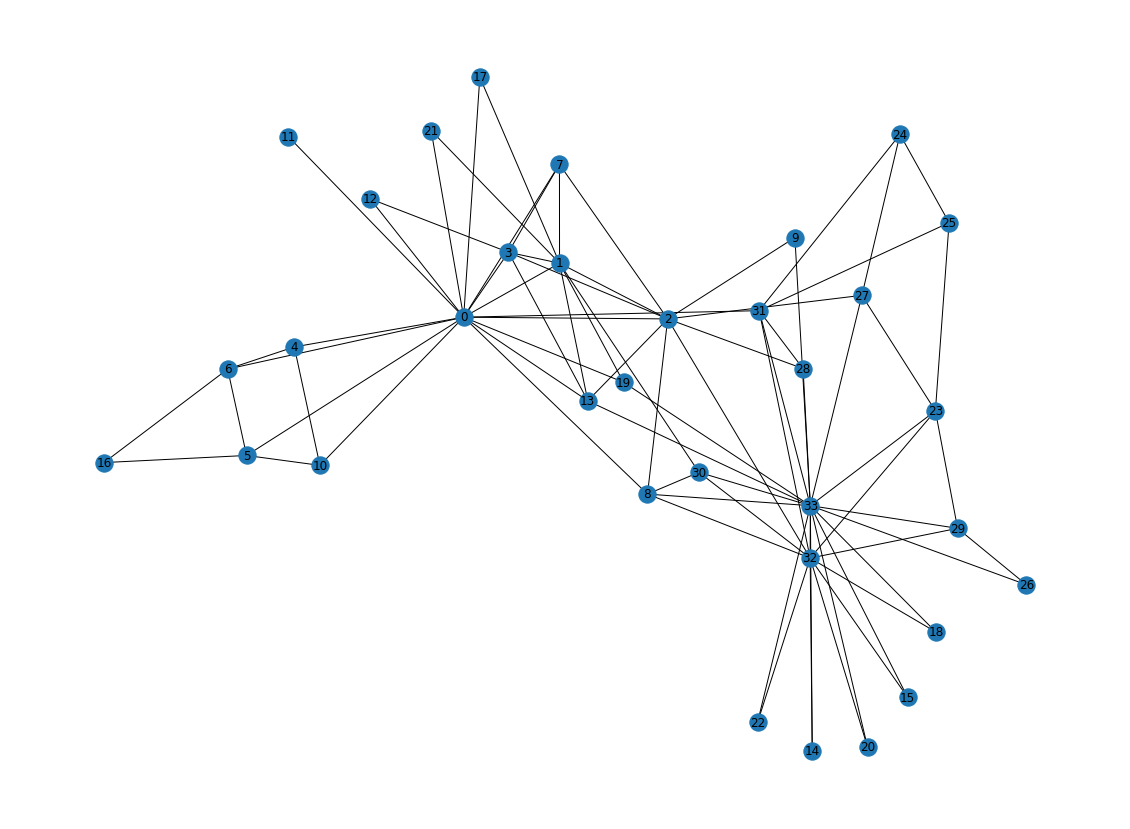

In [13]:
G_karate = nx.karate_club_graph()
karate_pos = nx.spring_layout(G_karate)
nx.draw_networkx(G_karate, karate_pos)

### Checking membership

In [14]:
mr_hi = 0
mr_hi in G_karate

True

In [15]:
G_karate.has_node(mr_hi)

True

In [16]:
ramy = 1337
ramy in G_karate

False

In [17]:
G_karate.has_node(ramy)

False

### Finding node neighbors

In [18]:
list(G_karate.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [19]:
# do these guys know each otehr?

member_id = 1
(mr_hi, member_id) in G_karate.edges

True

In [20]:
G_karate.has_edge(mr_hi, member_id)

True

In [21]:
john_a = 33
(mr_hi, john_a) in G_karate.edges

False

In [22]:
G_karate.has_edge(mr_hi, john_a)

False

### Adding attributes to nodes and edges

In [23]:
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

In [24]:
for node_id in G_karate.nodes:
    G_karate.nodes[node_id]["club"] = member_club[node_id]

In [25]:
# we can add nodes and clubs manually as this:

G_karate.add_node(11, club=0)

In [26]:
# get the data of a certain node: 

G_karate.nodes[mr_hi]

{'club': 0}

In [27]:
G_karate.nodes[john_a]

{'club': 1}

In [28]:
node_color = [
    'plum' if G_karate.nodes[v]["club"] == 0
    else 'skyblue' for v in G_karate]

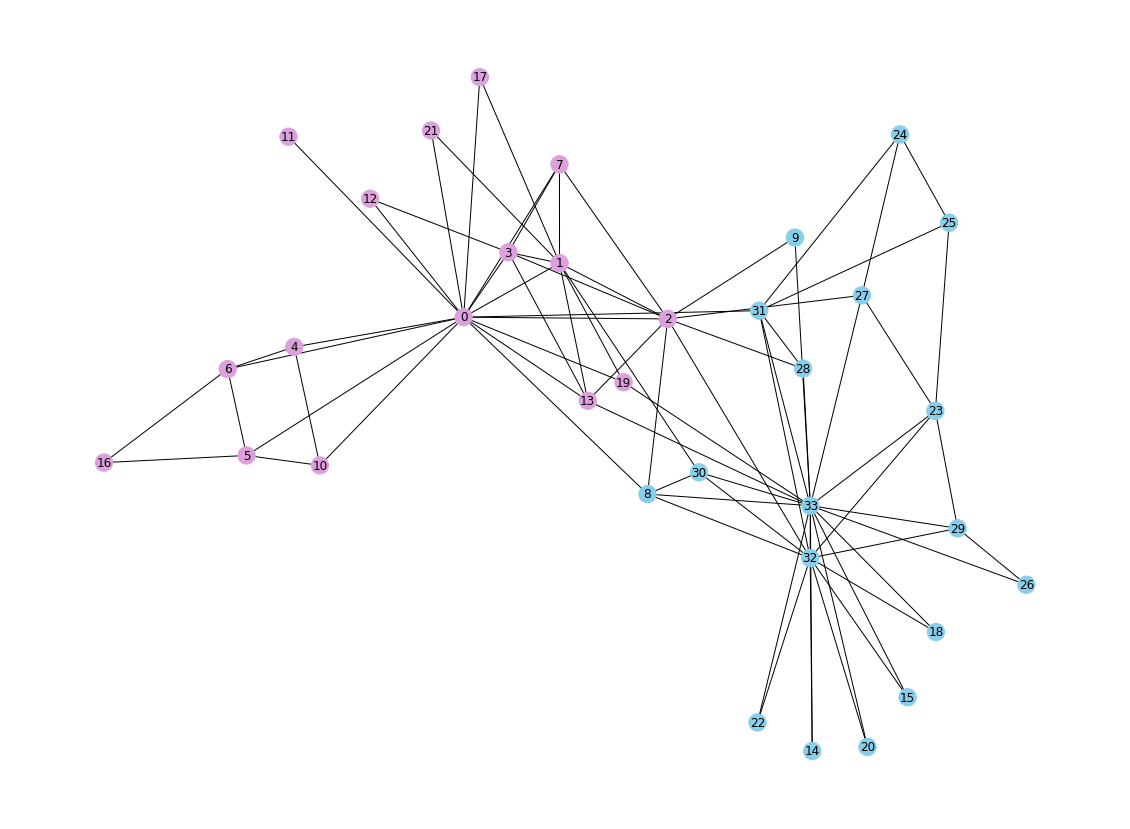

In [29]:
nx.draw_networkx(G_karate, karate_pos, label=True, node_color=node_color)

In [30]:
test_homophily(G_karate, 'club', 0)

(39, 10)

## Your Turn

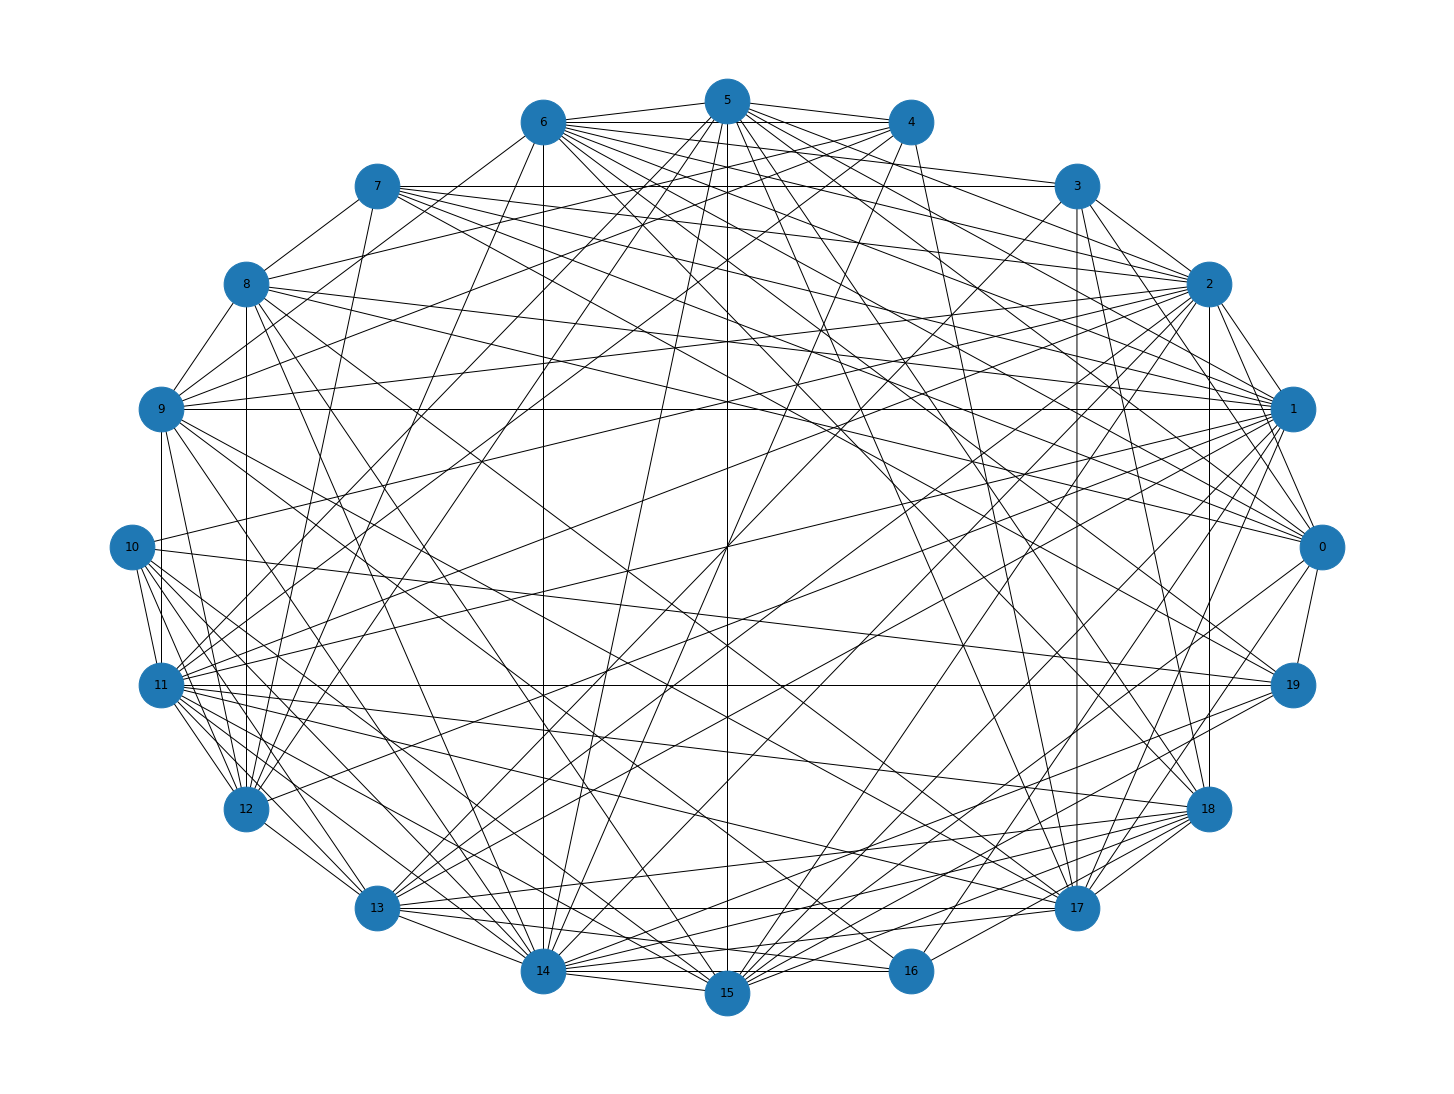

In [31]:
G_random = nx.erdos_renyi_graph(20,0.5) 
G_pos = nx.circular_layout(G_random)
nx.draw(G_random, G_pos, with_labels=True, node_size=2000) 
plt.show()

In [32]:
# 1. assign attributes to node at random..

In [33]:
# 2. Print the data of node 0  

In [34]:
# 3. Get the neighbors of node 0

In [35]:
# 4. Run the the test of homophily on this network

In [36]:
# 5. Do the graph edges show homophily? Justify your answer.

In [37]:
# 6. Given Twitter follower-followee networks, 
# on what basis people would follow other people? 

In [38]:
# 7. If homophily exists in Twitter follower-followee network, 
# in your opinion what would be the attribute that made this homophily appear?  

In [39]:
# 8. In your opinion, do relationships (edges) in Twitter formed based on 
# selection(focal closure) or social influence(membership closure)? Explain your answer.

In [40]:
# 9. True or false: homophily is found when edges are formed because of selection.
# Justify your choice.

In [41]:
# 10. Can you think of other real-life networks where 
# relationships(edges) are formed based on homophily?